In [2]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
ds = Dataset('/data/SO2/fkalkin/DataDir/Raw/Argo/temp-sal/RG_ArgoClim_Salinity_2019.nc')

In [3]:
pressure_lookup = ds['PRESSURE'][:].data
pressure_lookup

array([   2.5,   10. ,   20. ,   30. ,   40. ,   50. ,   60. ,   70. ,
         80. ,   90. ,  100. ,  110. ,  120. ,  130. ,  140. ,  150. ,
        160. ,  170. ,  182.5,  200. ,  220. ,  240. ,  260. ,  280. ,
        300. ,  320. ,  340. ,  360. ,  380. ,  400. ,  420. ,  440. ,
        462.5,  500. ,  550. ,  600. ,  650. ,  700. ,  750. ,  800. ,
        850. ,  900. ,  950. , 1000. , 1050. , 1100. , 1150. , 1200. ,
       1250. , 1300. , 1350. , 1412.5, 1500. , 1600. , 1700. , 1800. ,
       1900. , 1975. ], dtype=float32)

In [4]:
# from single_t_var import t_var
# from single_s_var import s_var
from t_var import t_var
from s_var import s_var
t_var = np.array(t_var)
s_var = np.array(s_var)

In [5]:
print('\t---temperature---')
print('# of EOFs \t | % of total variance represented')
rsum = 0
tsum = sum(t_var)
for i, num in enumerate(t_var[:15]):
    rsum += num
    print(f'{i+1} \t \t | {rsum / tsum * 100}')

	---temperature---
# of EOFs 	 | % of total variance represented
1 	 	 | 82.82417052245671
2 	 	 | 93.40076256477262
3 	 	 | 96.3164021396062
4 	 	 | 97.71395637602647
5 	 	 | 98.42445301106828
6 	 	 | 98.81924496935447
7 	 	 | 99.08820158250434
8 	 	 | 99.28130522865597
9 	 	 | 99.4262720055211
10 	 	 | 99.53127237819129
11 	 	 | 99.6100562234003
12 	 	 | 99.67458523825843
13 	 	 | 99.72596019765757
14 	 	 | 99.7665069801986
15 	 	 | 99.80078755966805


In [6]:
print('\t---salinity')
print('# of EOFs \t | % of total variance represented')
rsum = 0
tsum = sum(s_var)
for i, num in enumerate(s_var[:15]):
    rsum += num
    print(f'{i+1} \t \t | {rsum / tsum * 100}')

	---salinity
# of EOFs 	 | % of total variance represented
1 	 	 | 76.24888208222559
2 	 	 | 88.51112220968025
3 	 	 | 93.65196434023714
4 	 	 | 96.22536878684465
5 	 	 | 97.36956363951786
6 	 	 | 98.03606342537799
7 	 	 | 98.46924369015011
8 	 	 | 98.78024701211588
9 	 	 | 99.02185583688188
10 	 	 | 99.1985182508619
11 	 	 | 99.33538896145221
12 	 	 | 99.44209046264606
13 	 	 | 99.52721705388144
14 	 	 | 99.59861706257094
15 	 	 | 99.65935261499637


## plot

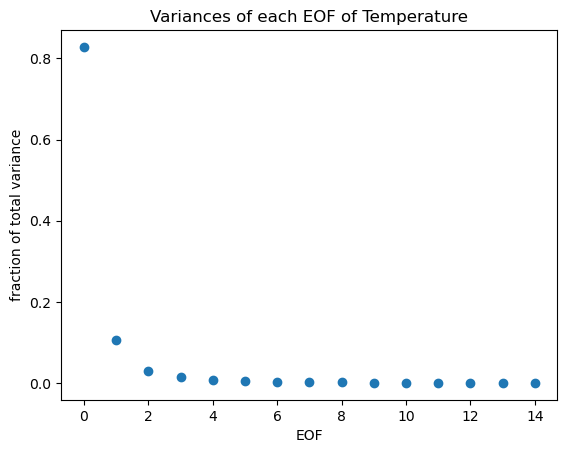

In [21]:
plt.scatter(x=np.arange(15), y=t_var[:15] / sum(t_var));
plt.ylabel('fraction of total variance')
plt.xlabel('EOF')
plt.title('Variances of each EOF of Temperature');

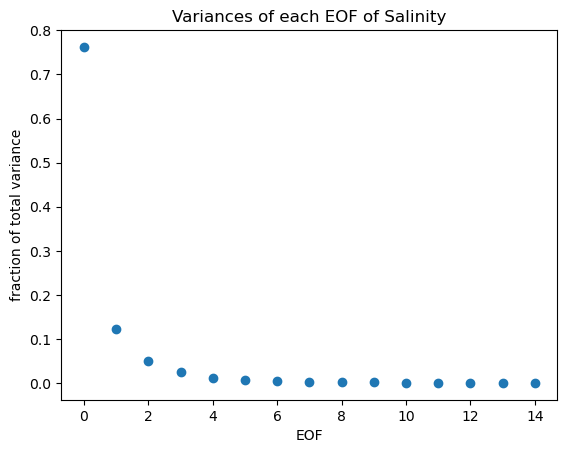

In [22]:
plt.scatter(x=np.arange(15), y=s_var[:15] / sum(s_var));
plt.ylabel('fraction of total variance')
plt.xlabel('EOF')
plt.title('Variances of each EOF of Salinity');

In [23]:
import pickle

# with open('ut.pkl', 'rb') as f:
#     U_t = pickle.load(f)

# with open('us.pkl', 'rb') as f:
#     U_s = pickle.load(f)

# with open('amps.pkl', 'rb') as f:
#     amp_s = pickle.load(f)

# with open('ampt.pkl', 'rb') as f:
#     amp_t = pickle.load(f)

with open('ut_full.pkl', 'rb') as f:
    U_t = pickle.load(f)

with open('us_full.pkl', 'rb') as f:
    U_s = pickle.load(f)

with open('amps_full.pkl', 'rb') as f:
    amp_s = pickle.load(f)

with open('ampt_full.pkl', 'rb') as f:
    amp_t = pickle.load(f)

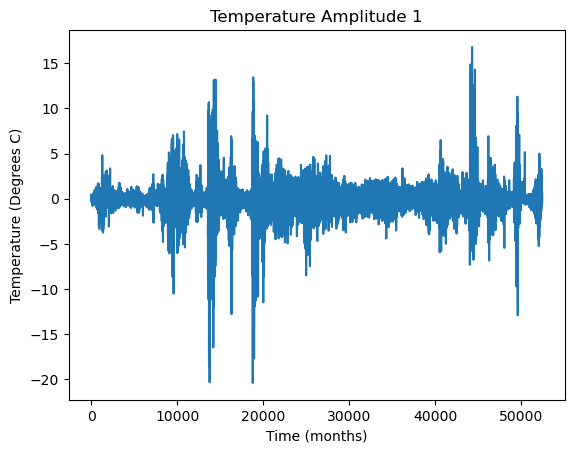

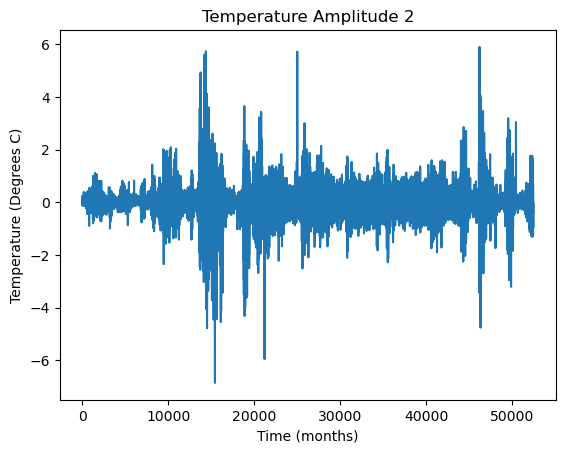

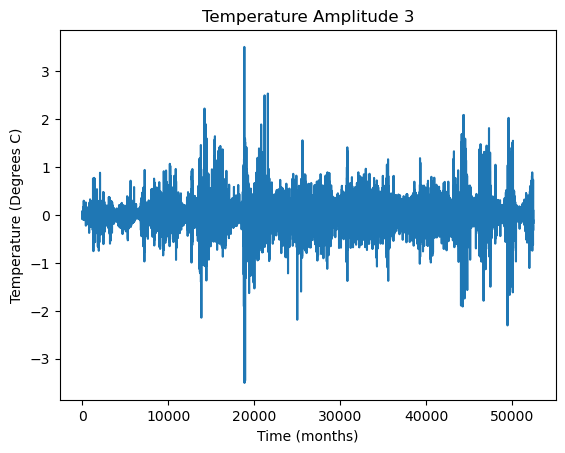

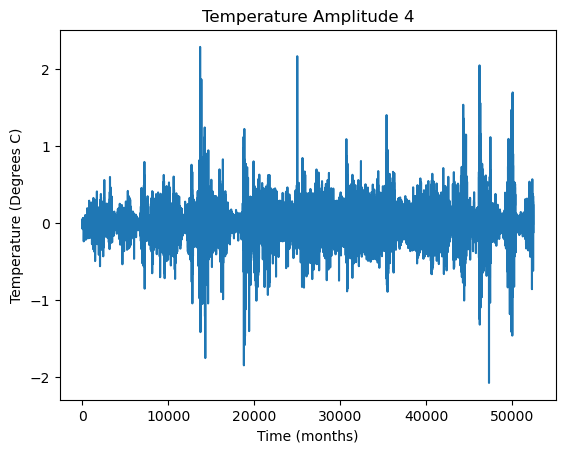

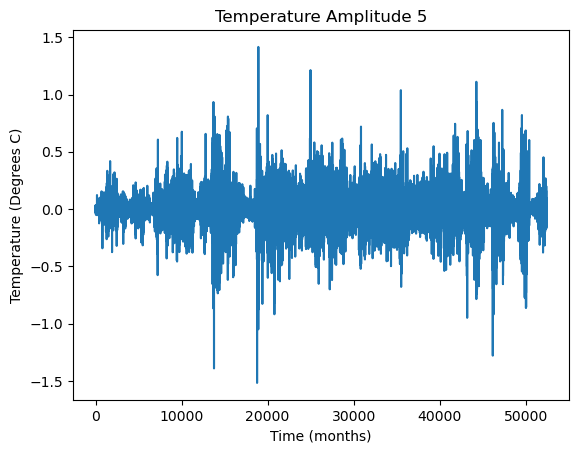

In [25]:
for i in range(5):
    plt.plot(np.arange(234 * 224), amp_t[i])
    plt.xlabel('Time (months)')
    plt.ylabel('Temperature (Degrees C)')
    # plt.ylim(top=0.4, bottom=-0.4)
    plt.title(f'Temperature Amplitude {i+1}')
    plt.show()

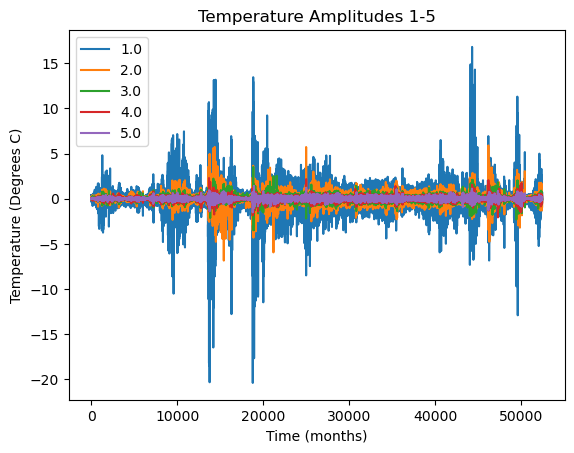

In [26]:
for i in range(5):
    plt.plot(np.arange(234 * 224), amp_t[i])
plt.xlabel('Time (months)')
plt.legend(np.arange(5) + np.ones(5))
plt.ylabel('Temperature (Degrees C)')
plt.title(f'Temperature Amplitudes 1-5')
plt.show()

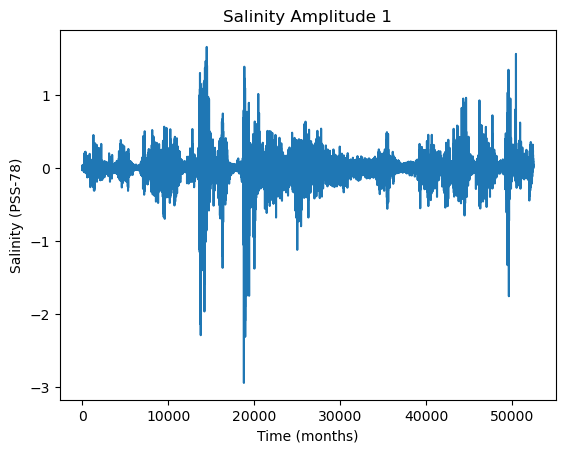

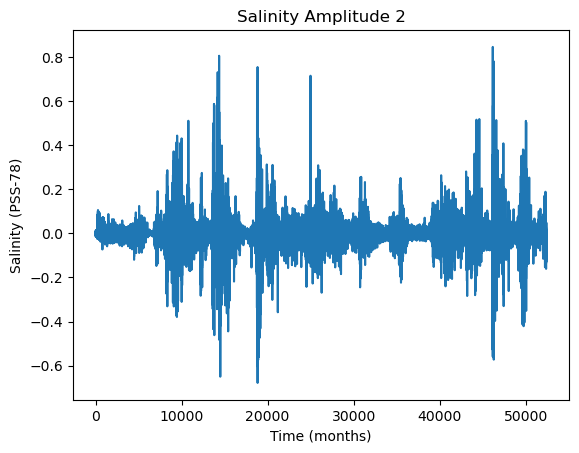

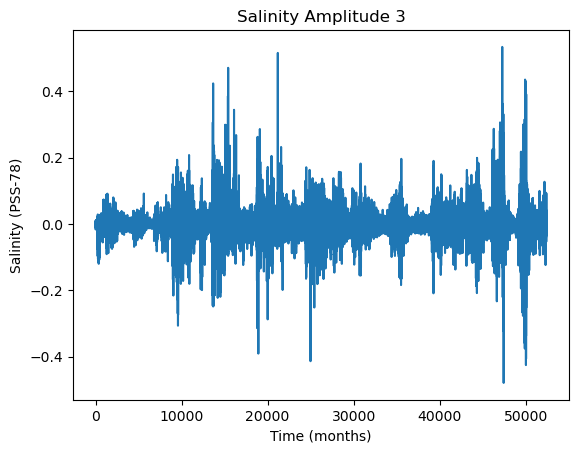

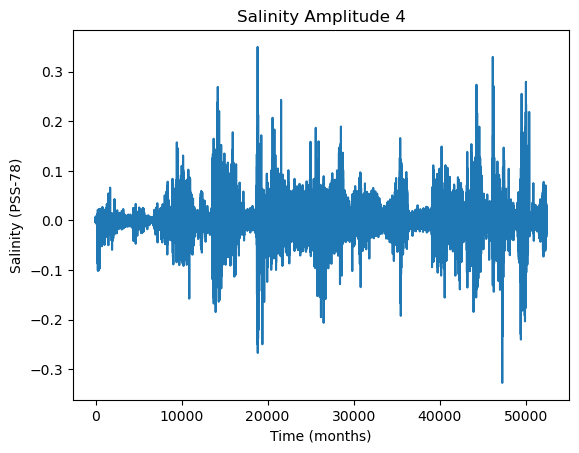

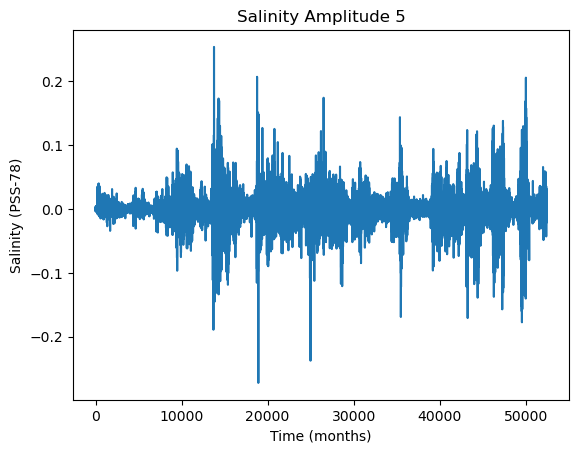

In [27]:
for i in range(5):
    plt.plot(np.arange(234 * 224), amp_s[i])
    plt.xlabel('Time (months)')
    plt.ylabel('Salinity (PSS-78)')
    plt.title(f'Salinity Amplitude {i+1}')
    plt.show()

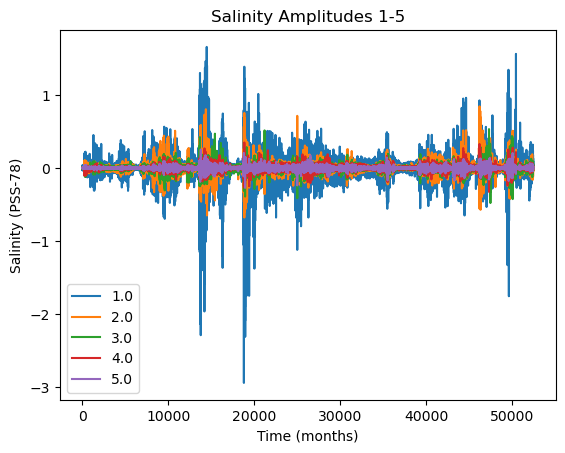

In [28]:
for i in range(5):
    plt.plot(np.arange(234 * 224), amp_s[i])
plt.xlabel('Time (months)')
plt.legend(np.arange(5) + np.ones(5))
plt.ylabel('Salinity (PSS-78)')
plt.title(f'Salinity Amplitudes 1-5')
plt.show()

# print('Amplitude 1 not included since it is much further off')

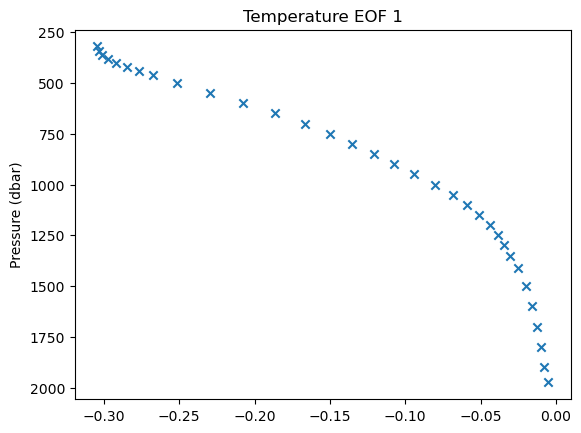

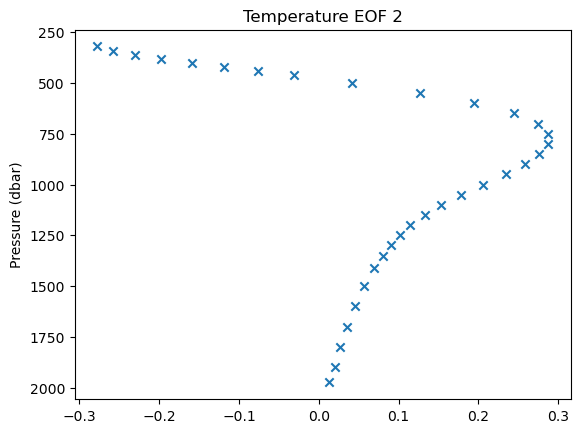

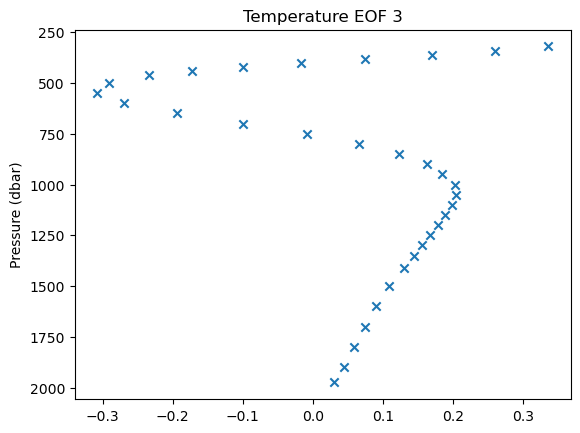

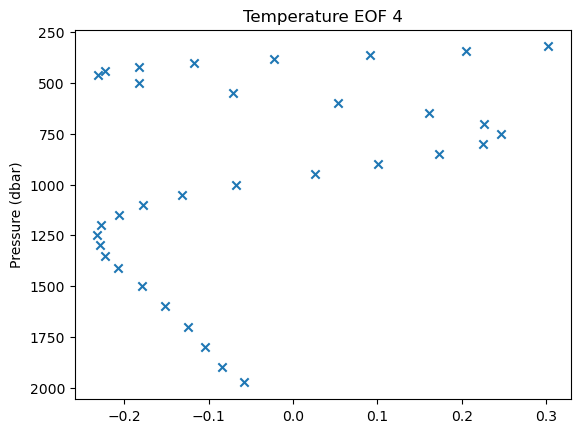

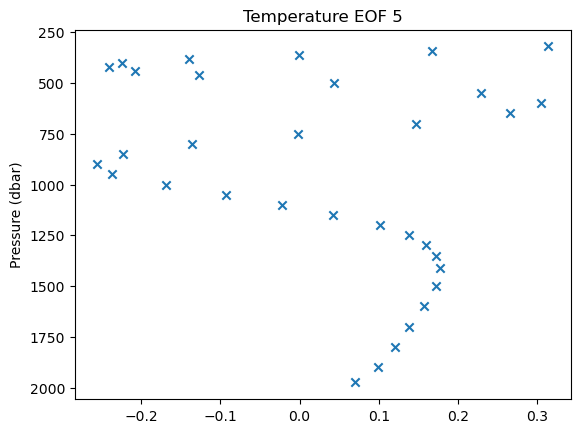

In [29]:
for i in range(5):
    plt.scatter(U_t.T[i], pressure_lookup[25:], marker='x')
    plt.ylabel('Pressure (dbar)')
    plt.title(f'Temperature EOF {i+1}')
    plt.gca().invert_yaxis()
    plt.show()

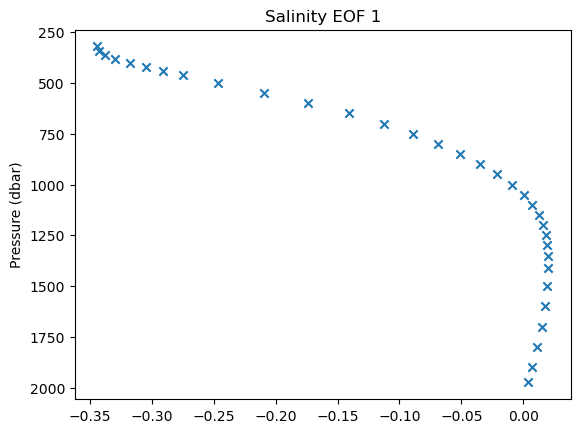

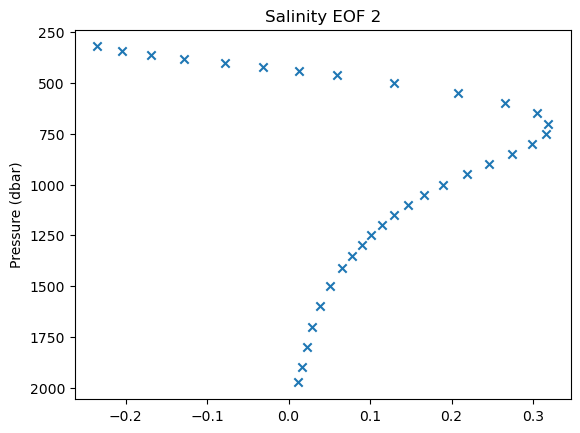

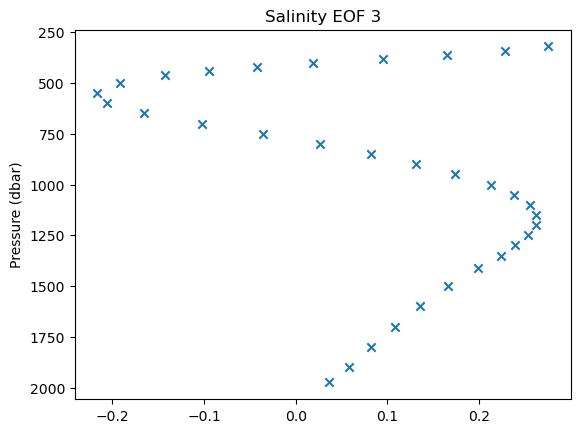

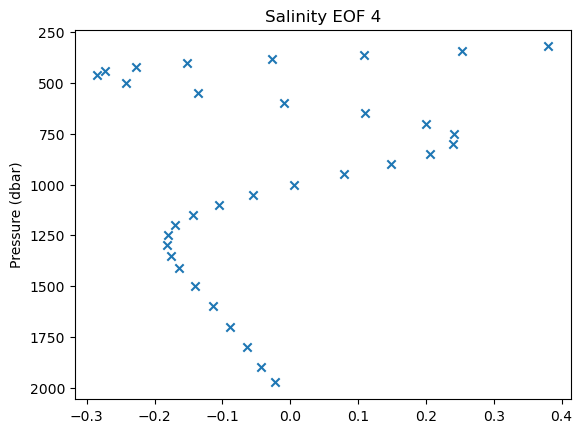

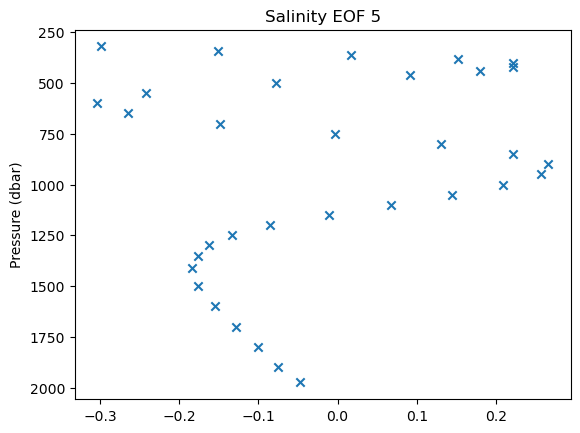

In [30]:
for i in range(5):
    plt.scatter(U_s.T[i], pressure_lookup[25:], marker='x')
    plt.ylabel('Pressure (dbar)')
    plt.title(f'Salinity EOF {i+1}')
    plt.gca().invert_yaxis()
    plt.show()